In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

UsageError: Line magic function `%` not found.


## Data Description

In [3]:
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
corr = diabetesDF.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


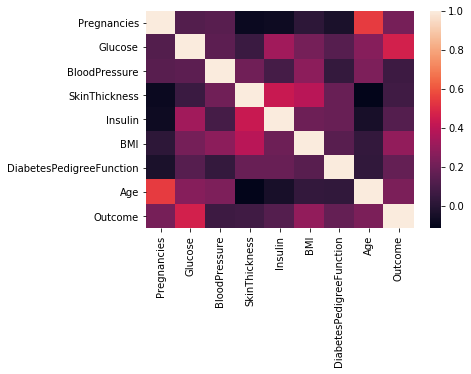

In [8]:
sns.heatmap(corr, xticklabels=corr.columns, 
         yticklabels=corr.columns)

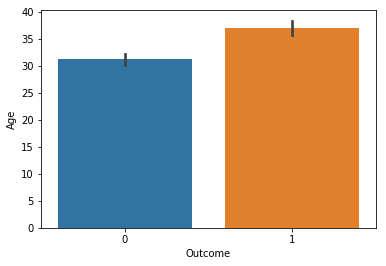

In [13]:
sns.barplot(x='Outcome',y='Age',data=diabetesDF)

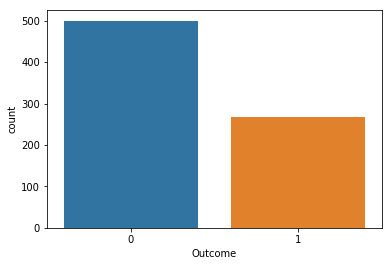

In [12]:
sns.countplot(x='Outcome',data=diabetesDF)

/Users/elham/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


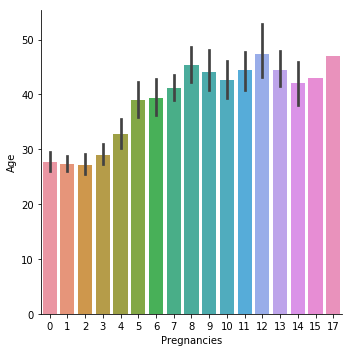

In [15]:
sns.factorplot(x='Pregnancies',y='Age',data=diabetesDF,kind='bar')

/Users/elham/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


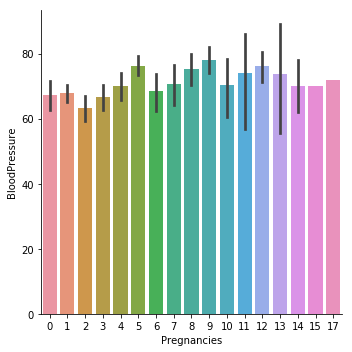

In [16]:
sns.factorplot(x='Pregnancies',y='BloodPressure',data=diabetesDF,kind='bar')

/Users/elham/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


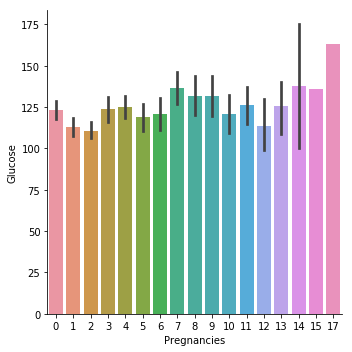

In [17]:
sns.factorplot(x='Pregnancies',y='Glucose',data=diabetesDF,kind='bar')

/Users/elham/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


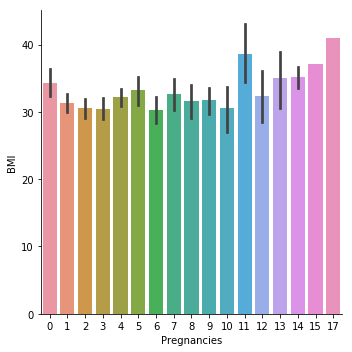

In [18]:
sns.factorplot(x='Pregnancies',y='BMI',data=diabetesDF,kind='bar')

/Users/elham/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/elham/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


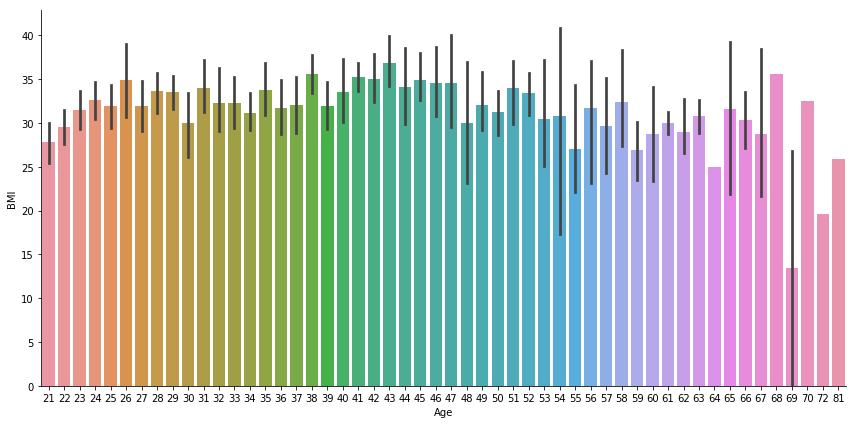

In [24]:
sns.factorplot(x='Age',y='BMI',data=diabetesDF,kind='bar',size=6, aspect=2)

## Training and Evaluating Machine Learning Model

In [54]:
dfTrain = diabetesDF[:650]   #To train our model we will be using 650 records.
dfTest = diabetesDF[650:750] #We will be using 100 records for testing.
dfCheck = diabetesDF[750:]  #the last 17 records to cross check our model.

In [55]:
trainY = np.asarray(dfTrain['Outcome'])
trainX = np.asarray(dfTrain.drop('Outcome',1))
testY = np.asarray(dfTest['Outcome'])
testX = np.asarray(dfTest.drop('Outcome',1))

In [56]:
means = np.mean(trainX, axis=0)
stds = np.std(trainX, axis=0)
trainX = (trainX - means)/stds
testX = (testX - means)/stds
# np.mean(trainX, axis=0) => check that new means equal 0
# np.std(trainX, axis=0) => check that new stds equal 1

In [57]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainX, trainY)

/Users/elham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
accuracy = diabetesCheck.score(testX, testY)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


In [64]:
coeff = list(diabetesCheck.coef_[0])
coeff

[0.4428747219760227,
 1.0527740518051887,
 -0.2422167649545674,
 -0.006288513871946207,
 -0.10299836235634575,
 0.762138980149958,
 0.3489850847508592,
 0.1222251048756131]

In [67]:
labels = list(dfTrain.drop('Outcome',1).columns)
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [68]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff

Text(0.5, 0, 'Importance')

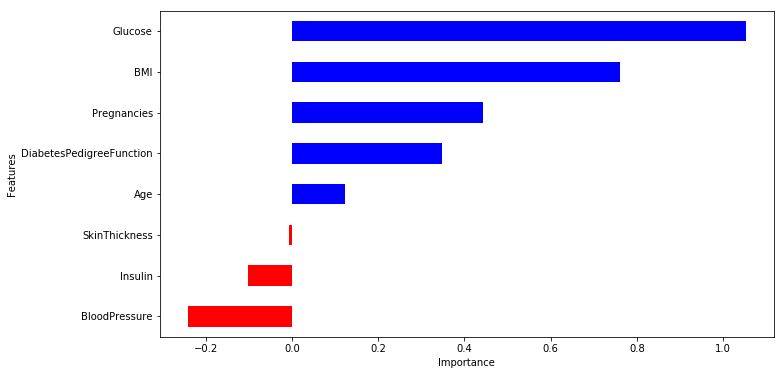

In [69]:
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(diabetesDF.drop('Outcome',axis=1), 
                                                    diabetesDF['Outcome'], test_size=0.30, 
                                                    random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/elham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       150
           1       0.76      0.56      0.64        81

   micro avg       0.78      0.78      0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



In [70]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)

/Users/elham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_scaled,y_train)

/Users/elham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
predictions = logmodel.predict(X_test)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.35      1.00      0.52        81

   micro avg       0.35      0.35      0.35       231
   macro avg       0.18      0.50      0.26       231
weighted avg       0.12      0.35      0.18       231



/Users/elham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/elham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/elham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Sving the model

In [72]:
from sklearn.externals import joblib

In [73]:
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

In [74]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testX, testY)
print("accuracy = ",accuracyModel * 100,"%")


accuracy =  78.0 %


## Making Predictions with the model

In [75]:
dfCheck.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1


In [76]:
sampleData = dfCheck[:1]
sampleData

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1


In [77]:
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
sampleDataFeatures

array([[ 0.06006212,  0.48837659,  0.07098736, -1.27427064, -0.6856602 ,
        -0.07842408,  2.07370463, -0.94759493]])

In [78]:
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)

In [79]:
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.4385153 0.5614847]]
prediction: [1]


In [120]:
sampleData2 = dfCheck.iloc[[2]]
sampleData2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
752,3,108,62,24,0,26.0,0.223,25,0


In [121]:
sampleDataFeatures2 = np.asarray(sampleData2.drop('Outcome',1))
sampleDataFeatures2

array([[  3.   , 108.   ,  62.   ,  24.   ,   0.   ,  26.   ,   0.223,
         25.   ]])

In [122]:
sampleDataFeatures2 = (sampleDataFeatures2 - means)/stds
sampleDataFeatures2

array([[-0.23795603, -0.37752248, -0.33734703,  0.22963479, -0.6856602 ,
        -0.73896085, -0.75319833, -0.69020391]])

In [123]:
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures2)

In [124]:
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures2)
prediction = diabetesLoadedModel.predict(sampleDataFeatures2)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.89710381 0.10289619]]
prediction: [0]
